In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import tensorflow as tf
from matplotlib import pyplot as plt

from tensorflow.contrib import learn
from sklearn.metrics import mean_squared_error

from lstm import lstm_model
from data_processing import generate_data

C:\Users\Ian\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
LOG_DIR = './ops_logs/sin'
TIMESTEPS = 3
#隐层为5层
RNN_LAYERS = [{'num_units': 5}]
#不设置全连接层
DENSE_LAYERS = None
TRAINING_STEPS = 10000
PRINT_STEPS = TRAINING_STEPS / 10
BATCH_SIZE = 100

In [3]:
regressor = learn.SKCompat(learn.Estimator(
    model_fn=lstm_model(
        TIMESTEPS,
        RNN_LAYERS,
        DENSE_LAYERS
    ),
    model_dir=LOG_DIR
))

Instructions for updating:
Please replace uses of any Estimator from tf.contrib.learn with an Estimator from tf.estimator.*
Instructions for updating:
When switching to tf.estimator.Estimator, use tf.estimator.RunConfig instead.
INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_task_type': None, '_task_id': 0, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x000002381BA64908>, '_master': '', '_num_ps_replicas': 0, '_num_worker_replicas': 0, '_environment': 'local', '_is_chief': True, '_evaluation_master': '', '_train_distribute': None, '_tf_config': gpu_options {
  per_process_gpu_memory_fraction: 1.0
}
, '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_secs': 600, '_log_step_count_steps': 100, '_session_config': None, '_save_checkpoints_steps': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_model_dir': './ops_logs/sin'}
Instructions for updating:
Please switch to the Estimator inter

In [4]:
X, y = generate_data(np.sin, np.linspace(0, 100, 10000, dtype=np.float32), TIMESTEPS, seperate=False)

# create a lstm instance and validation monitor
validation_monitor = learn.monitors.ValidationMonitor(X['val'], y['val'],
                                                     every_n_steps=PRINT_STEPS,
                                                     early_stopping_rounds=1000)
print(X['train'])
print(y['train'])


Instructions for updating:
Monitors are deprecated. Please use tf.train.SessionRunHook.
[[[ 0.        ]
  [ 0.01000083]
  [ 0.02000067]]

 [[ 0.01000083]
  [ 0.02000067]
  [ 0.0299985 ]]

 [[ 0.02000067]
  [ 0.0299985 ]
  [ 0.03999333]]

 ...

 [[-0.6693338 ]
  [-0.6618692 ]
  [-0.65434426]]

 [[-0.6618692 ]
  [-0.65434426]
  [-0.64674807]]

 [[-0.65434426]
  [-0.64674807]
  [-0.63908714]]]
[[ 0.0299985 ]
 [ 0.03999333]
 [ 0.04998416]
 ...
 [-0.64674807]
 [-0.63908714]
 [-0.6313623 ]]


In [5]:
regressor.fit(X['train'], y['train'], 
              monitors=[validation_monitor], 
              batch_size=BATCH_SIZE,
              steps=TRAINING_STEPS)

Instructions for updating:
Please use tensorflow/transform or tf.data.
Instructions for updating:
Please feed input to tf.data to support dask.
Instructions for updating:
Please feed input to tf.data to support dask.
Instructions for updating:
Please access pandas data directly.
Instructions for updating:
Please access pandas data directly.
Instructions for updating:
Please use tensorflow/transform or tf.data.
Instructions for updating:
Please convert numpy dtypes explicitly.
Instructions for updating:
Consider using a class from tf.estimator.
Instructions for updating:
Use `tf.losses.mean_squared_error` and explicit logits computation.
Instructions for updating:
Please switch to tf.train.get_global_step
Instructions for updating:
When switching to tf.estimator.Estimator, use tf.estimator.EstimatorSpec. You can use the `estimator_spec` method to create an equivalent one.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameter

INFO:tensorflow:loss = 0.00018701715, step = 12400 (0.421 sec)
INFO:tensorflow:global_step/sec: 232.21
INFO:tensorflow:loss = 0.00020381856, step = 12500 (0.431 sec)
INFO:tensorflow:global_step/sec: 232.752
INFO:tensorflow:loss = 0.00018731276, step = 12600 (0.430 sec)
INFO:tensorflow:global_step/sec: 240.613
INFO:tensorflow:loss = 0.00016939292, step = 12700 (0.417 sec)
INFO:tensorflow:global_step/sec: 239.458
INFO:tensorflow:loss = 0.00016108216, step = 12800 (0.417 sec)
INFO:tensorflow:global_step/sec: 223.619
INFO:tensorflow:loss = 0.00014279831, step = 12900 (0.447 sec)
INFO:tensorflow:global_step/sec: 215.874
INFO:tensorflow:loss = 0.00018202775, step = 13000 (0.465 sec)
INFO:tensorflow:global_step/sec: 239.745
INFO:tensorflow:loss = 0.00018855512, step = 13100 (0.416 sec)
INFO:tensorflow:global_step/sec: 241.195
INFO:tensorflow:loss = 0.00016164214, step = 13200 (0.415 sec)
INFO:tensorflow:global_step/sec: 207.132
INFO:tensorflow:loss = 0.00018075058, step = 13300 (0.483 sec)
IN

SKCompat()

In [6]:
predicted = regressor.predict(X['test'])
rmse = np.sqrt(((predicted - y['test']) ** 2).mean(axis=0))
score = mean_squared_error(predicted, y['test'])
print ("MSE: %f" % score)

INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from ./ops_logs/sin\model.ckpt-20000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
MSE: 0.000175


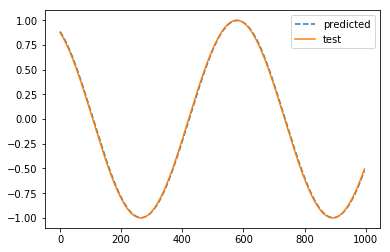

In [7]:
plot_predicted, = plt.plot(predicted, linestyle='--',label='predicted')
plot_test, = plt.plot(y['test'], label='test')
plt.legend(handles=[plot_predicted, plot_test])